# Overview

Here is a description of the data sets:

Response Database:  
* This file includes details on each individual commercial that aired on TV since 2014  and the attributed performance or responses for each commercial.. There is a field definition tab explaining what each variable means but I am happy to answer any questions about the data beyond the field definitions.

Database:  
* This data represents overall daily business performance for a different brand and should not be combined with the response database. 
* The data in this file is broken out into two types of variables– predictors or drivers, and outcomes. 
    * The spend variables would be the drivers and the purchases (in orange) are the outcomes or results that can be measured in concert with the spends and any relevant exogenous factors. 
    * The purchases can also be analyzed independently from the spends for insights into business growth, seasonality, etc.
    * Although the data has been recoded to protect the privacy of the advertiser, we can tell you that the directionality and the relationships over time and across variables have not been changed.  
    * We can also tell you that the advertiser is in the online travel category (think Kayak, Priceline, Expedia).

Exercise
* For the <b>response database</b>, the exercise is fairly open ended.  Our objective here is see how you approach a new data set. What insights can you derive pertaining to what drives website volume and what doesn’t? What approach do you take to gathering these insights with respect to tools/software, models, etc.?
* For the <b>database</b> part of the exercise, you might consider the following prompts to guide your analysis:
    - What are the most impactful drivers of total purchases?
    - If you had an extra dollar to spend, where would you spend it to yield the maximum return on your investment?
    - Can you quantify the longitudinal/compounding effect of marketing over time?
    - There are several periods of time in which there was no television advertising 
        – how would you measure the impact of the absence of TV? Are you able to quantify this?

While we’ve broken out purchases by new and returning and different vertical types, these are of secondary importance to total purchases. Any other insights you’d like to provide outside of these questions is welcomed. Additionally, you may use any of these data sets as a platform to discuss creative ideas around analysis broadly, even if you don’t have the time or resources to perform the analysis, ideas qualify as solid work product too.  

Please don’t hesitate to reach out with any questions about the data, the exercise, or the position. Please take this coming week with the data and send your insights in whatever format you like (Word, Email, Powerpoint, Tableau, etc.).

In [3]:
import pandas as pd
import seaborn.apionly as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import tqdm

# Read the data sets

In [4]:
database_raw = pd.read_excel(
    "data/Database.xlsx",
    header=[0, 1, 2]
)
database_raw.dtypes

                                                                                Date                               
MARKETING SPENDS WITH PARTNERS                Unnamed: 0_level_1                Remarketing Spend                      float64
                                              Unnamed: 1_level_1                Partner Search Spend                   float64
                                              Unnamed: 2_level_1                Partner A Hotel Spend                  float64
                                              Unnamed: 3_level_1                Partner B Hotel Spend                  float64
                                              Unnamed: 4_level_1                Partner C Hotel Spend                  float64
                                              Unnamed: 5_level_1                Other Partner Spend                    float64
                                              Unnamed: 6_level_1                Partner TOTAL                          flo

In [5]:
response_raw = (
    pd.read_excel(
        "data/Response Database.xlsx", 
        header=0
    )
    .iloc[:, :17]
)
response_raw.dtypes

Response                   int64
Date              datetime64[ns]
Time                      object
Network                   object
Daypart                   object
Rate                     float64
Imps (000)               float64
CPM                      float64
Property                  object
Start                     object
End                       object
Buy Type                  object
Length                    object
C/B/S                     object
Program                   object
Week of           datetime64[ns]
Creative Title            object
dtype: object

In [6]:
database_raw.head()

MARKETING SPENDS WITH PARTNERS                       \
                       Unnamed: 0_level_1   Unnamed: 1_level_1   
Date                    Remarketing Spend Partner Search Spend   
2015-01-01                       36813.64             39730.54   
2015-01-02                       41297.77             50297.34   
2015-01-03                       37550.40             39719.12   
2015-01-04                       39006.15             40016.30   
2015-01-05                       35591.18             56930.77   

                                                                              \
              Unnamed: 2_level_1    Unnamed: 3_level_1    Unnamed: 4_level_1   
Date       Partner A Hotel Spend Partner B Hotel Spend Partner C Hotel Spend   
2015-01-01              28657.73              25030.39              12503.82   
2015-01-02              33937.95              34147.43              14660.26   
2015-01-03              30088.45              38768.40              11431.65   
2015-01-04              32730.76              38668.44              13072.17   
2015-01-05              32376.76              35723.47              23534.97   

                                                   \
            Unnamed: 5_level_1 Unnamed: 6_level_1   
Date       Other Partner Spend      Partner TOTAL   
2015-01-01            16259.28          158995.40   
2015-01-02            22460.13          196800.88   
2015-01-03            24716.81          182274.83   
2015-01-04            18327.53          181821.35   
2015-01-05            23711.85          207869.00   

           MARKETING SPENDS WITH AFFILIATES                                \
                         Unnamed: 7_level_1            Unnamed: 8_level_1   
Date         Affiliate Standard Hotel Spend Affiliate Premium Hotel Spend   
2015-01-01                         14095.02                      11951.52   
2015-01-02                         17634.10                      15081.16   
2015-01-03                         14781.58                      11972.12   
2015-01-04                         14831.60                      13526.64   
2015-01-05                         18945.79                      18465.50   

                                                ...           \
                    Unnamed: 9_level_1          ...            
Date       Affiliate Other Hotel Spend          ...            
2015-01-01                     8864.16          ...            
2015-01-02                    10087.10          ...            
2015-01-03                     8895.49          ...            
2015-01-04                     9380.47          ...            
2015-01-05                    10820.58          ...            

                OUTCOME VARIABLE: PURCHASES                               \
           NEW CUSTOMER vs REPEAT CUSTOMERS                                
Date          New Customer Flight Purchases New Customer Hotel Purchases   
2015-01-01                             3998                         9598   
2015-01-02                             4859                        11775   
2015-01-03                             4156                         9834   
2015-01-04                             4304                         8616   
2015-01-05                             5762                         9059   

                                                                             \
                                                                              
Date       Repeat Customer Flight Purchases Repeat Customer Hotel Purchases   
2015-01-01                             5338                           26032   
2015-01-02                             6996                           31122   
2015-01-03                             5765                           25794   
2015-01-04                             5880                           22308   
2015-01-05                             8418                           26528   

                                            

In [7]:
response_raw.head()

,Response,Date,Time,Network,Daypart,Rate,Imps (000),CPM,Property,Start,End,Buy Type,Length,C/B/S,Program,Week of,Creative Title
0,12,2014-02-17,06:46:00,TBS,Morning,1725.20,278.0,6.205755,DAYTIME,06:00:00,15:00:00,GR,30,NatCbl,NaN,2014-02-17,Yoga
1,0,2014-02-17,08:35:00,ESPNEWS,Morning,82.65,24.0,3.443750,Day,06:00:00,18:00:00,PE,30,NatCbl,NaN,2014-02-17,Sauna
2,0,2014-02-17,08:56:00,DIY,Morning,110.20,13.0,8.476923,Morning Rotation M-F 7:0,07:00:00,09:00:00,GR,30,NatCbl,NaN,2014-02-17,Sauna
3,5,2014-02-17,09:16:00,MSNBC,Daytime,870.20,133.0,6.542857,MSNBC LIVE M-F 9A-5P-,09:00:00,17:00:00,GR,30,NatCbl,NaN,2014-02-17,Sauna
4,22,2014-02-17,09:51:00,MSNBC,Daytime,870.20,133.0,6.542857,MSNBC LIVE M-F 9A-5P-,09:00:00,17:00:00,GR,30,NatCbl,NaN,2014-02-17,Yoga


In [8]:
database_cleaned = (
    pd.read_excel(
        "data/Database.xlsx",
        header=[2]
    )
    .reset_index(drop=True)
    .rename({"index" : "Date"})
)
database_cleaned["TV TOTAL"] = database_cleaned["TV Campaign 1"] +\
database_cleaned["TV Campaign 2"] +\
database_cleaned["TV Campaign 3"]
database_cleaned["TV Present"] = pd.Categorical(database_cleaned["TV TOTAL"] > 0).labels

C:\Users\Ulric\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: 'labels' is deprecated. Use 'codes' instead


In [9]:
database_cleaned["year"] = database_cleaned["Date"].apply(lambda x: x.year)
database_cleaned["month"] = database_cleaned["Date"].apply(lambda x: x.month)
database_cleaned["day"] = database_cleaned["Date"].apply(lambda x: x.day)
database_cleaned["unix_second"] = database_cleaned["Date"].apply(lambda x: x.value / 1e9)
database_cleaned["unix_second_normed"] = database_cleaned["Date"].apply(lambda x: x.value / 1e9 - min(database_cleaned["unix_second"]) )


# Database data set questions

* What are the most impactful drivers of total purchases?
* If you had an extra dollar to spend, where would you spend it to yield the maximum return on your investment?
* Can you quantify the longitudinal/compounding effect of marketing over time?
* There are several periods of time in which there was no television advertising 
    * how would you measure the impact of the absence of TV? Are you able to quantify this?

### check for autocorrelation

* http://www.statsref.com/HTML/index.html?arima.html
* http://people.duke.edu/~rnau/arimrule.htm

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

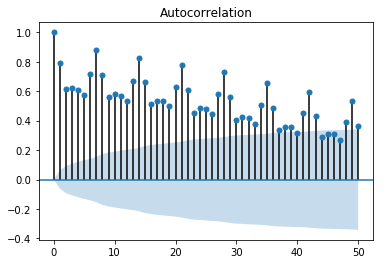

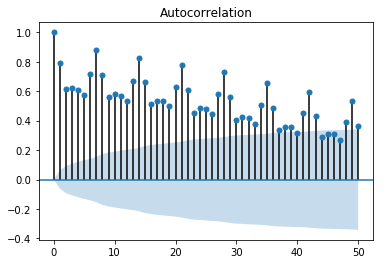

In [11]:
plot_acf(database_cleaned["Total Hotel Purchases"], lags=50)

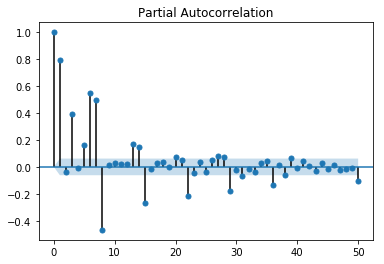

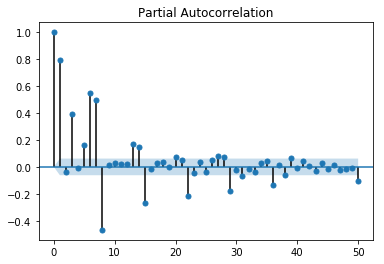

In [12]:
plot_pacf(database_cleaned["Total Hotel Purchases"], lags=50)

### Fit ARMAX

(p, d, q) are the 
* p = AR order (autocorrelation)
    * coefficients for time lag terms
* d = the degree of differencing, 
* q = the Moving average order
    * coefficients for lagged error terms

In [13]:
def fitTimeSeries(df, p=1, d= 1, q=1, covariateList=None, maxiter=50):
    
    fittedModel = sm.tsa.ARIMA(
        endog = df["Total Hotel Purchases"].astype(float), 
        order = (p, d, q), # p, q
        exog= df.loc[:,
                    covariateList
        ] if covariateList else None,
        dates = df["Date"],
        freq=None
    ).fit(maxiter=maxiter, method = "css-mle", full_output=True)
    
    return fittedModel

In [14]:
import sys

def gridSearchTimeSeries(df, pList=range(1, 8), dList = range(0, 8), qList = range(0, 8), covariateList=None):
    results = []
    for p in tqdm.tqdm_notebook(pList, desc="p"):
        for d in dList:
            for q in qList:

                print("p = %i, d = %i, q = %i" % (p, d, q))
                try:
                    fittedModel = fitTimeSeries(df, p, d, q, covariateList)
                    results.append(
                        (p, d, q, fittedModel.llf, fittedModel.aic, fittedModel.bic, fittedModel.hqic)
                    )
                except ValueError as vErr:
                    print("Error: {0}".format(vErr))
#                 except LinAlgError as laErr:
#                     print("Error: {0}".format(laErr))
                except:
                    print ("Unexpected error:", sys.exc_info()[0])
                    pass
                    
            
    return pd.DataFrame(results, columns=[
        "p", "d","q", "llf", "aic", "bic", "hqic"])

In [19]:
gsDiffResults = gridSearchTimeSeries(
    database_cleaned,
    pList=[0], 
    dList = range(0, 3), 
    qList = [0]
)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


p = 0, d = 0, q = 0
p = 0, d = 1, q = 0
p = 0, d = 2, q = 0



In [21]:
gsDiffResults.sort_values("hqic")

,p,d,q,llf,aic,bic,hqic
1,0,1,0,-9810.173589,19624.347178,19634.168679,19628.079491
2,0,2,0,-10179.414615,20362.829231,20372.648737,20366.560966
0,0,0,0,-10262.169000,20528.338000,20538.161495,20532.070890


In [22]:
diffModel = fitTimeSeries(
    df=database_cleaned, 
    p=0, 
    d=1, 
    q=0, 
    covariateList=None
)

acf
* Autocorrelation at lag 2,5, 7
    * seasonal
pacf
* tails off gradually
    * suggests MA component

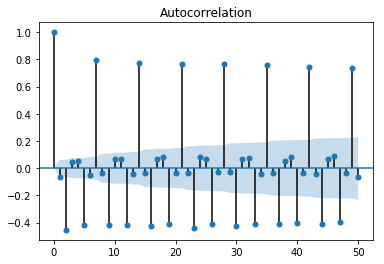

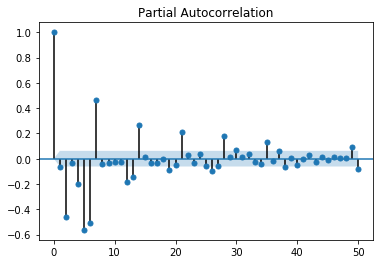

In [24]:
_= plot_acf(diffModel.resid, lags=50)
_ = plot_pacf(diffModel.resid, lags=50)

In [ ]:
gridSearchResults = gridSearchTimeSeries(
    database_cleaned,
    pList=range(1, 8), 
    dList = range(0, 3), 
    qList = [1, 3, 6, 7]
)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


p = 1, d = 0, q = 1
p = 1, d = 0, q = 3
p = 1, d = 0, q = 6
p = 1, d = 0, q = 7
p = 1, d = 1, q = 1
p = 1, d = 1, q = 3
p = 1, d = 1, q = 6
p = 1, d = 1, q = 7
p = 1, d = 2, q = 1
p = 1, d = 2, q = 3
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 1, d = 2, q = 6
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 1, d = 2, q = 7
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 2, d = 0, q = 1
p = 2, d = 0, q = 3
p = 2, d = 0, q = 6
p = 2, d = 0, q = 7
p = 2, d = 1, q = 1
p = 2, d = 1, q = 3
p = 2, d = 1, q = 6


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 1, q = 7


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 2, q = 1
p = 2, d = 2, q = 3
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 2, d = 2, q = 6
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 2, d = 2, q = 7
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 3, d = 0, q = 1
p = 3, d = 0, q = 3
p = 3, d = 0, q = 6


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 0, q = 7


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 1, q = 1
p = 3, d = 1, q = 3
p = 3, d = 1, q = 6


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 1, q = 7


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 2, q = 3
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 3, d = 2, q = 6
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 3, d = 2, q = 7
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 4, d = 0, q = 1
p = 4, d = 0, q = 3


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 0, q = 6


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 0, q = 7


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 1, q = 1
p = 4, d = 1, q = 3
p = 4, d = 1, q = 6


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 1, q = 7


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 2, q = 1
p = 4, d = 2, q = 3
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 4, d = 2, q = 6
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 4, d = 2, q = 7
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 5, d = 0, q = 1
p = 5, d = 0, q = 3


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 0, q = 6


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 0, q = 7


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 1, q = 1
p = 5, d = 1, q = 3


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 1, q = 6


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 1, q = 7


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 2, q = 1
p = 5, d = 2, q = 3
p = 5, d = 2, q = 6
Error: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
p = 5, d = 2, q = 7


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 0, q = 1
p = 6, d = 0, q = 3


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 0, q = 6


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 0, q = 7


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 1, q = 1
p = 6, d = 1, q = 3


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 1, q = 6


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 1, q = 7


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 2, q = 1
p = 6, d = 2, q = 3


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 2, q = 6


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:520: RuntimeWarning: invalid value encountered in log
  invarcoefs = -np.log((1-params)/(1+params))


In [1]:
print(database_cleaned["Date"].min(), database_cleaned["Date"].max())

NameError: name 'database_cleaned' is not defined

In [42]:
gridSearchResults.sort_values("hqic").head()

,p,d,q,llf,aic,bic,hqic
60,7,2,1,-9194.038204,18408.076408,18457.173940,18426.735086
61,7,2,2,-9193.094507,18408.189014,18462.196300,18428.713560
56,7,1,0,-9198.525043,18415.050085,18459.246843,18431.845495
57,7,1,1,-9197.558267,18415.116534,18464.224042,18433.778100
58,7,1,2,-9196.963605,18415.927211,18469.945469,18436.454933


In [24]:
# sns.heatmap(
#     gridSearchResults.pivot(index="p", columns=["q"], values = "hqic")
# )
# # gridSearchResults.sort_values("hqic")

# Fit best base model

In [43]:
tsBaseModel = fitTimeSeries(
    df=database_cleaned, 
    p=7, 
    d=2, 
    q=1, 
    covariateList=None
)

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [45]:
print(tsBaseModel.summary())

                                ARIMA Model Results                                 
Dep. Variable:     D2.Total Hotel Purchases   No. Observations:                 1002
Model:                       ARIMA(7, 2, 1)   Log Likelihood               -9194.038
Method:                             css-mle   S.D. of innovations           2320.109
Date:                      Fri, 16 Mar 2018   AIC                          18408.075
Time:                              14:37:30   BIC                          18457.173
Sample:                          01-03-2015   HQIC                         18426.734
                               - 09-30-2017                                         
                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
const                             -0.0577      0.106     -0.545      0.586        -0.265     0.150
ar.L1.D2.Total Hotel Pu

In [46]:
print(database_cleaned["Date"].min(), database_cleaned["Date"].max())

2015-01-01 00:00:00 2017-09-30 00:00:00


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


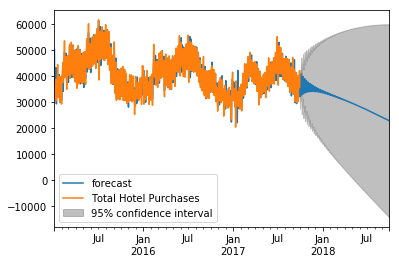

In [48]:
_ = tsBaseModel.plot_predict(
    start = (database_cleaned["Date"].min() + pd.Timedelta(2, unit="D")).strftime("%Y-%m-%d"),
    end = (database_cleaned["Date"].max() + pd.Timedelta(1, unit="Y")).strftime("%Y-%m-%d")
)


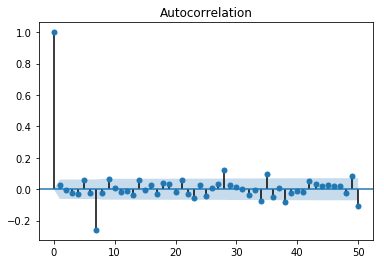

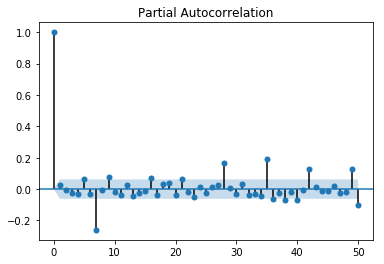

In [81]:
_ = plot_acf(tsBaseModel.resid, lags=50)
_ = plot_pacf(tsBaseModel.resid, lags=50)

# Add high level covariates

In [101]:
database_cleaned.columns

Index(['Date', 'Remarketing Spend', 'Partner Search Spend',
       'Partner A Hotel Spend', 'Partner B Hotel Spend',
       'Partner C Hotel Spend', 'Other Partner Spend', 'Partner TOTAL',
       'Affiliate Standard Hotel Spend', 'Affiliate Premium Hotel Spend',
       'Affiliate Other Hotel Spend', 'Affiliate Standard Flight Spend',
       'Affiliate Premium Flight Spend', 'Affiliate Other Flight Spend',
       'Affiliate Standard Rental Car Spend',
       'Affiliate Premium Rental Car Spend',
       'Affiliate Other Rental Car Spend', 'Affiliate VP\nCost',
       'Affiliate TOTAL', 'Brand Search Mobile Spend',
       'Brand Search Non-Mobile Spend', 'Flight Search Spend',
       'Other Search Spend', 'Hotel Mobile Search Spend',
       'Hotel Non-Mobile Search Spend', 'Rental Car Mobile\nSpend',
       'Rental Car Non-Mobile\nSpend', 'Search TOTAL', 'TV Campaign 1',
       'TV Campaign 2', 'TV Campaign 3', 'New Customer Flight Purchases',
       'New Customer Hotel Purchases', 'Repea

In [49]:
gsTotals = gridSearchTimeSeries(
    database_cleaned,
    pList= range(1,8),
    dList = range(0, 3), 
    qList = range(0, 3), 
    covariateList=[
        'Partner TOTAL',
        'Affiliate TOTAL',
        'Search TOTAL',
        'TV TOTAL'
    ]
)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


p = 1, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 1, q = 0
p = 1, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 2, q = 0
p = 1, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 0, q = 0
p = 2, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 1, q = 0
p = 2, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 2, q = 0
p = 2, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 0, q = 0
p = 3, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 2, q = 0
p = 3, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 2, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 2, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 2, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 2, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [52]:
gsTotals.sort_values("hqic").head()

,p,d,q,llf,aic,bic,hqic
56,7,0,2,-8901.062706,17832.125411,17905.801621,17860.122085
47,6,0,2,-8943.277342,17914.554683,17983.319145,17940.684912
38,5,0,2,-8945.892240,17917.784481,17981.637196,17942.048265
55,7,0,1,-8945.195392,17918.390783,17987.155246,17944.521013
54,7,0,0,-9000.000979,18026.001959,18089.854674,18050.265743


In [53]:
tsTotalsModel = fitTimeSeries(
    df=database_cleaned, 
    p=7,
    d=0,
    q=2, 
    covariateList=[
        'Partner TOTAL',
        'Affiliate TOTAL',
        'Search TOTAL',
        'TV TOTAL'
    ],
)

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [55]:
print(tsTotalsModel.summary())

                                ARMA Model Results                               
Dep. Variable:     Total Hotel Purchases   No. Observations:                 1004
Model:                        ARMA(7, 2)   Log Likelihood               -8901.061
Method:                          css-mle   S.D. of innovations           1708.120
Date:                   Fri, 16 Mar 2018   AIC                          17832.121
Time:                           14:41:24   BIC                          17905.797
Sample:                       01-01-2015   HQIC                         17860.118
                            - 09-30-2017                                         
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const                        1.729e+04   1324.662     13.054      0.000      1.47e+04  1.99e+04
Partner TOTAL                   0.0095      0.002      5

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


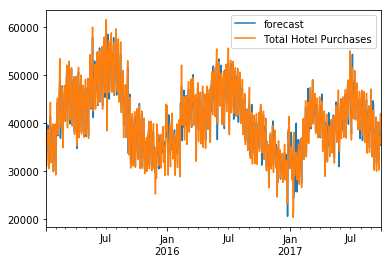

In [57]:
_ = tsTotalsModel.plot_predict(
    start = (database_cleaned["Date"].min() + pd.Timedelta(2, unit="D")).strftime("%Y-%m-%d"),
    end = (database_cleaned["Date"].max() + pd.Timedelta(0, unit="Y")).strftime("%Y-%m-%d")
)

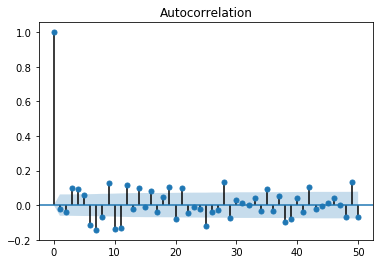

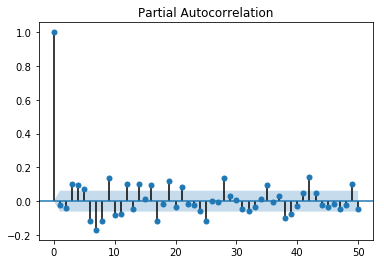

In [80]:
_ = plot_acf(tsTotalsModel.resid, lags=50)
_ = plot_pacf(tsTotalsModel.resid, lags=50)

# TV contribution model

In [141]:
database_cleaned.columns

Index(['Date', 'Remarketing Spend', 'Partner Search Spend',
       'Partner A Hotel Spend', 'Partner B Hotel Spend',
       'Partner C Hotel Spend', 'Other Partner Spend', 'Partner TOTAL',
       'Affiliate Standard Hotel Spend', 'Affiliate Premium Hotel Spend',
       'Affiliate Other Hotel Spend', 'Affiliate Standard Flight Spend',
       'Affiliate Premium Flight Spend', 'Affiliate Other Flight Spend',
       'Affiliate Standard Rental Car Spend',
       'Affiliate Premium Rental Car Spend',
       'Affiliate Other Rental Car Spend', 'Affiliate VP\nCost',
       'Affiliate TOTAL', 'Brand Search Mobile Spend',
       'Brand Search Non-Mobile Spend', 'Flight Search Spend',
       'Other Search Spend', 'Hotel Mobile Search Spend',
       'Hotel Non-Mobile Search Spend', 'Rental Car Mobile\nSpend',
       'Rental Car Non-Mobile\nSpend', 'Search TOTAL', 'TV Campaign 1',
       'TV Campaign 2', 'TV Campaign 3', 'New Customer Flight Purchases',
       'New Customer Hotel Purchases', 'Repea

In [58]:
gsTv = gridSearchTimeSeries(
    database_cleaned,
    pList= range(1,8),
    dList = range(0, 3), 
    qList = range(0, 3), 
    covariateList=[
        'Partner TOTAL',
        'Affiliate TOTAL',
        'Search TOTAL',
        'TV Campaign 1',
       'TV Campaign 2', 'TV Campaign 3'
    ]
)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


p = 1, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 0, q = 1
p = 1, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 1, q = 0
p = 1, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 2, q = 0
p = 1, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 1, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 2, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 2, d = 2, q = 2
p = 3, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 0, q = 2
p = 3, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 2, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 3, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 0, q = 0
p = 4, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 2, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 4, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 2, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 5, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 2, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 6, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 0, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 0, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 0, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 1, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 1, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 1, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 2, q = 0


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 2, q = 1


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


p = 7, d = 2, q = 2


C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [61]:
gsTotals.sort_values("hqic").head()

,p,d,q,llf,aic,bic,hqic
56,7,0,2,-8901.062706,17832.125411,17905.801621,17860.122085
47,6,0,2,-8943.277342,17914.554683,17983.319145,17940.684912
38,5,0,2,-8945.892240,17917.784481,17981.637196,17942.048265
55,7,0,1,-8945.195392,17918.390783,17987.155246,17944.521013
54,7,0,0,-9000.000979,18026.001959,18089.854674,18050.265743


In [73]:
tsTvModel = fitTimeSeries(
    df=database_cleaned, 
    p=7, 
    d=0,
    q=2, 
    covariateList=[
        'Partner TOTAL',
        'Affiliate TOTAL',
        'Search TOTAL',
        'TV Campaign 1',
       'TV Campaign 2', 
        'TV Campaign 3'
    ],
)

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [74]:
print(tsTvModel.summary())

                                ARMA Model Results                               
Dep. Variable:     Total Hotel Purchases   No. Observations:                 1004
Model:                        ARMA(7, 2)   Log Likelihood               -8898.405
Method:                          css-mle   S.D. of innovations           1703.724
Date:                   Fri, 16 Mar 2018   AIC                          17830.809
Time:                           14:52:09   BIC                          17914.309
Sample:                       01-01-2015   HQIC                         17862.539
                            - 09-30-2017                                         
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
const                        1.705e+04   1279.965     13.319      0.000      1.45e+04  1.96e+04
Partner TOTAL                   0.0097      0.002      5

C:\Users\Ulric\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)
C:\Users\Ulric\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


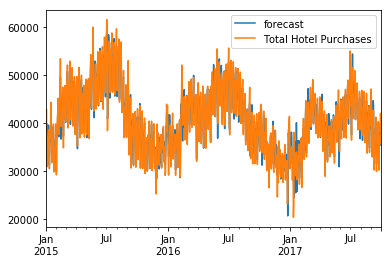

In [68]:
fig = plt.figure(figsize=(15,10))
fig = tsTvModel.plot_predict(
    start = database_cleaned["Date"].min().strftime("%Y-%m-%d"),
    end = (database_cleaned["Date"].max() + pd.Timedelta(0, unit="D")).strftime("%Y-%m-%d")
)
fig.show()

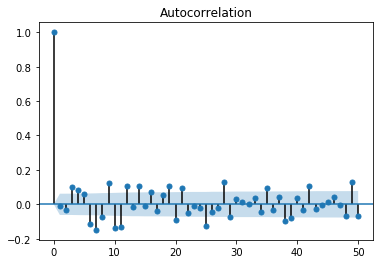

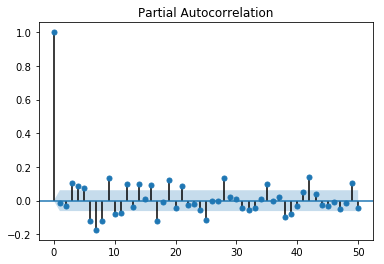

In [79]:
_ = plot_acf(tsTvModel.resid, lags=50)
_ = plot_pacf(tsTvModel.resid, lags=50)